In [5]:
from st_app_lib import *

RUNWARE_API_KEY = st.secrets["RUNWARE_API_KEY"]

In [6]:
runware = Runware(api_key=RUNWARE_API_KEY)
await runware.connect()

request_image = IImageInference(
    positivePrompt="STARLING AI",
    model="runware:100@1",
    numberResults=1,
    negativePrompt="cloudy, rainy",
    useCache=False,
    height=512 ,
    width=512,
    )

images = await runware.imageInference(requestImage=request_image)

imageURLs = [image.imageURL for image in images]

imageURLs

['https://im.runware.ai/image/ws/0.5/ii/274b9b3f-e8fd-4ac0-b373-0fa22b685a1a.jpg']

In [30]:
from runware import Runware, IImageBackgroundRemoval

runware = Runware(api_key=RUNWARE_API_KEY)
await runware.connect()

image_path = "https://im.runware.ai/image/ws/0.5/ii/274b9b3f-e8fd-4ac0-b373-0fa22b685a1a.jpg"
remove_image_background_payload = IImageBackgroundRemoval(inputImage=image_path, 
                                                          outputFormat="PNG",
                                                          rgba=[255, 255, 255, 0],
                                                          alphaMatting=True)

processed_images = await runware.imageBackgroundRemoval(
  removeImageBackgroundPayload=remove_image_background_payload
)
for image in processed_images:
  print(image.imageURL)

https://im.runware.ai/image/ws/0.5/ii/7d6c5ed3-c0c0-4811-b29c-02a0a8b08d6c.png


In [29]:
from PIL import Image
import requests

my_url = "https://im.runware.ai/image/ws/0.5/ii/a4f85127-5b7c-4c98-96c8-41364a86c88a.png"

def convertImage(my_url):

	img = Image.open(requests.get(my_url, stream=True).raw)
	img = img.convert("RGBA")

	datas = img.getdata()

	newData = []

	for item in datas:
		if item[0] == 255 and item[1] == 255 and item[2] == 255:
			newData.append((255, 255, 255, 0))
		else:
			newData.append(item)

	img.putdata(newData)
	img.save("./New.png", "PNG")
	print("Successful")

convertImage()


Successful


In [2]:
from PIL import Image
import requests

my_url = "https://im.runware.ai/image/ws/0.5/ii/a4f85127-5b7c-4c98-96c8-41364a86c88a.png"
im1 = Image.open("/workspaces/starling-ai/tshirt.jpg")


img = Image.open(requests.get(my_url, stream=True).raw)
img = img.convert("RGBA")

datas = img.getdata()

newData = []

for item in datas:
		if item[0] == 255 and item[1] == 255 and item[2] == 255:
			newData.append((255, 255, 255, 0))
		else:
			newData.append(item)

img.putdata(newData)

im1.paste(img.resize([200,200]), (60, 130), img)

im1

ValueError: images do not match

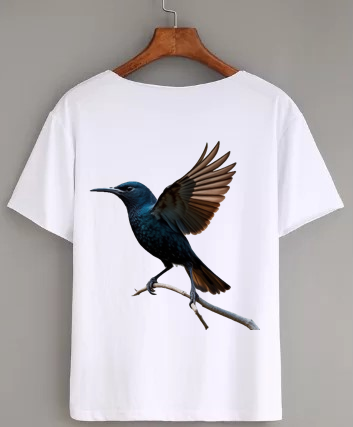

In [59]:
im1 = Image.open("/workspaces/starling-ai/tshirt.jpg")
im2 = Image.open('New.png').resize([200,200])
im1.paste(im2, (60, 130), im2)

im1

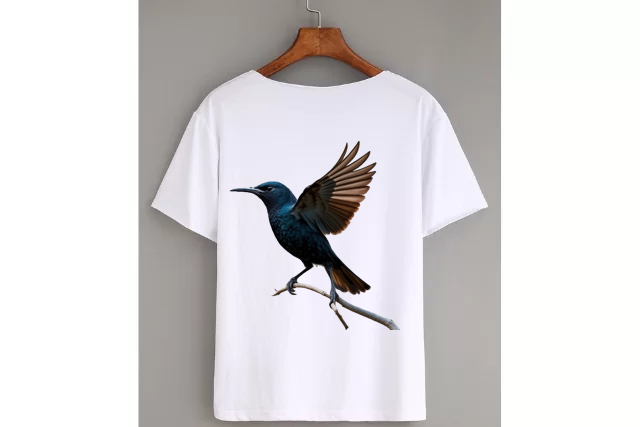

In [56]:
im1.crop((0,50,90,90))
im1